#wine

In [0]:
import pandas as pd 
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/che1147')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler as scaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sklearn 
from sklearn import neighbors
import matplotlib
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

In [0]:
dfwine=pd.read_csv("winequalityN.csv")
dfwine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###missing value

In [0]:
# first we check the missing value 
dfwine[dfwine.isnull().T.any().T].shape
#only 34 samples have missing value
#first we can try to fill it an if we can not have an well method to fill them we can just drop them 

(34, 13)

In [0]:
dfna=dfwine[dfwine.isnull().T.any().T]
#fixed acidity	
#volatile acidity	
#citric acid	
#residual sugar
#chlorides
#pH
#sulphates

Text(0.5, 1.0, 'missing value in each feature')

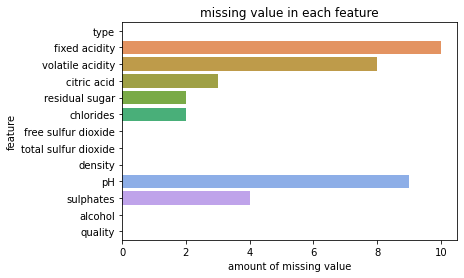

In [0]:
import seaborn as sns
missinval=(dfna.shape[0]-dfna.count()).tolist()
sns.barplot(y=dfna.columns.tolist(),x=missinval)
plt.xlabel('amount of missing value')
plt.ylabel('feature')
plt.title('missing value in each feature')

Text(0.5, 1.0, 'fixed acidity distribution')

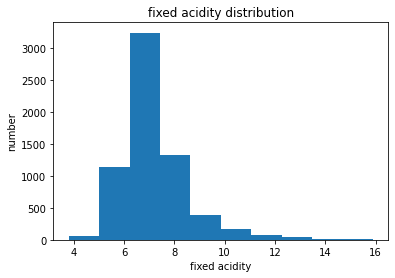

In [0]:
#fixed acidity
dfsub=dfwine['fixed acidity'].dropna()
plt.hist(dfsub.values.tolist())
plt.xlabel('fixed acidity')
plt.ylabel('number')
plt.title("fixed acidity distribution")

In [0]:
#make it a funtion 
def histpic(x):
  dfsub=dfwine[x].dropna()
  return dfsub.values.tolist()

Text(0.5, 1.0, 'volatile acidity distribution')

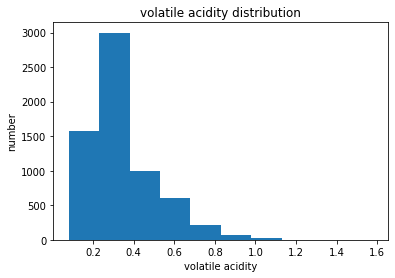

In [0]:
plt.hist(histpic('volatile acidity'))
plt.xlabel('volatile acidity')
plt.ylabel('number')
plt.title("volatile acidity distribution")

Text(0.5, 1.0, 'citric acid distribution')

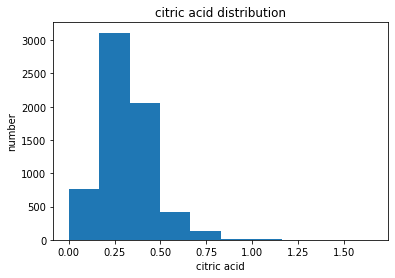

In [0]:
plt.hist(histpic('citric acid'))

plt.xlabel('citric acid')
plt.ylabel('number')
plt.title("citric acid distribution")

Text(0.5, 1.0, 'residual sugar distribution')

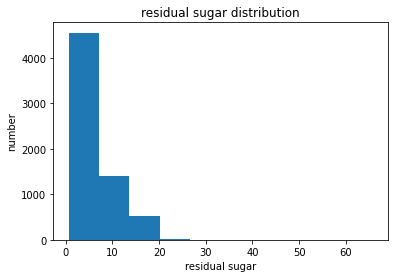

In [0]:
plt.hist(histpic('residual sugar'))

plt.xlabel('residual sugar')
plt.ylabel('number')
plt.title("residual sugar distribution")

Text(0.5, 1.0, 'chlorides distribution')

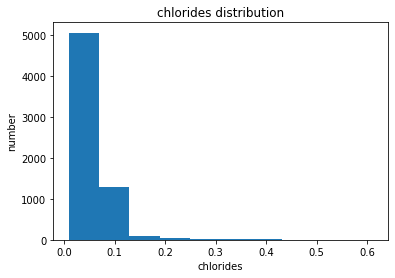

In [0]:
plt.hist(histpic('chlorides'))
plt.xlabel('chlorides')
plt.ylabel('number')
plt.title("chlorides distribution")

Text(0.5, 1.0, 'pH distribution')

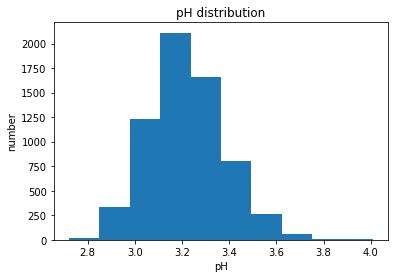

In [0]:
plt.hist(histpic('pH'))
plt.xlabel('pH')
plt.ylabel('number')
plt.title("pH distribution")

Text(0.5, 1.0, 'sulphates distribution')

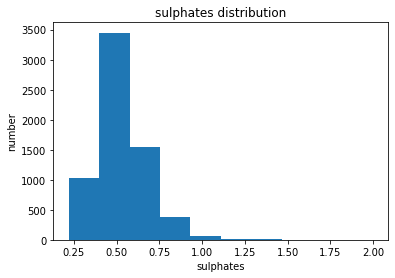

In [0]:
plt.hist(histpic('sulphates'))
plt.xlabel('sulphates')
plt.ylabel('number')
plt.title("sulphates distribution")

In [0]:
#我好累啊 所以我全部用平均数填
dfwine['typewhite']=(dfwine['type']=='white')+0
dfwine['typered']=(dfwine['type']=='red')+0
dfwine=dfwine.iloc[:,1:]

for i in dfwine.columns.tolist():
  dfwine[i]=dfwine[i].fillna(dfwine[i].mean())

In [0]:
dfwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,typewhite,typered
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0,1


###standardlize

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#a=dfwine.columns.tolist()
y=dfwine['quality']
#dfwine=pd.DataFrame(scaler.fit_transform(dfwine))
#dfwine.columns=a
dfwine=dfwine.drop(['quality'],axis=1)

In [0]:
dfwine['target']=y

###explore

In [0]:
dfwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,typewhite,typered,target
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1,0,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1,0,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1,0,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1,0,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0,1,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,0,1,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,0,1,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0,1,5


Text(0.5, 1.0, 'white wine distribution')

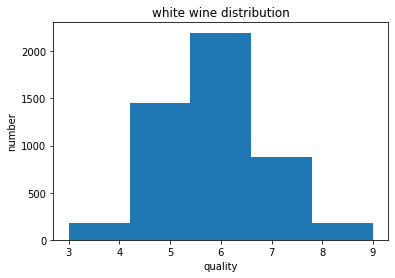

In [0]:
# any realtion ship between white and red 

plt.hist(dfwine.loc[dfwine['typewhite']>0]['target'],bins=5)
plt.xlabel('quality')
plt.ylabel('number')
plt.title("white wine distribution")

Text(0.5, 1.0, 'red wine distribution')

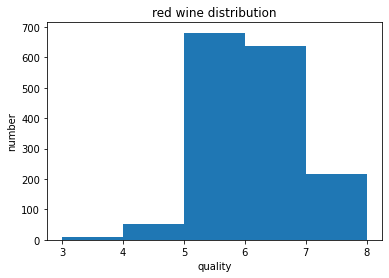

In [0]:
plt.hist(dfwine.loc[dfwine['typered']>0]['target'],bins=5)
plt.xlabel('quality')
plt.ylabel('number')
plt.title("red wine distribution")

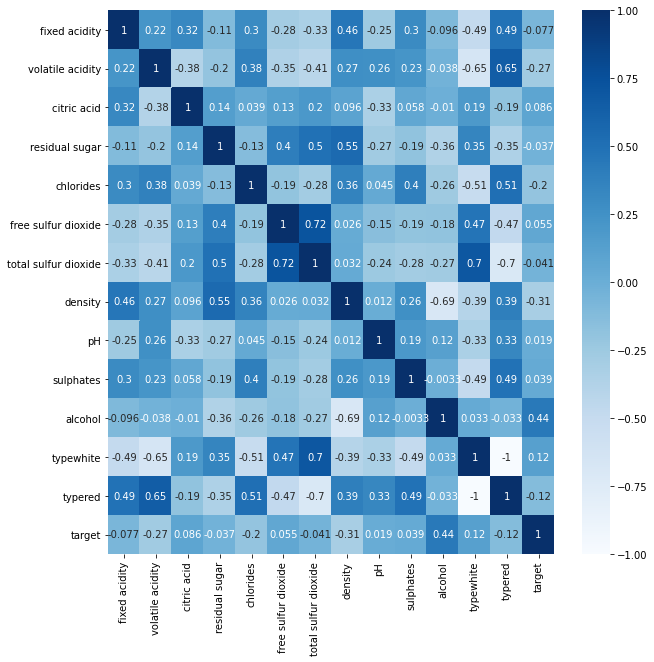

In [0]:
# See the relationship between each faeatures
import seaborn as sns

corr = dfwine.corr()


plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='Blues', annot=True)

we can see that free sulfur dioxide and total sulfur dioxide have a great relationship. and the wine is white or red have something to do with acidity.

In [0]:
corrlist=corr.iloc[:-1,-1].tolist()
labellist=corr.iloc[:-1,-1].index.tolist()
for i in range(len(corrlist)):
  corrlist[i]=abs(corrlist[i])
dfcorr=pd.DataFrame(corrlist)
dfcorr['name']=labellist
dfcorr=dfcorr.sort_values(by=[0],ascending=True)

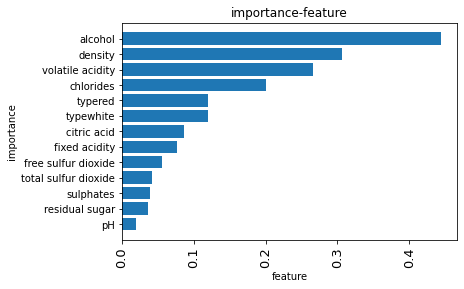

In [0]:
plt.barh(dfcorr['name'],dfcorr[0])
plt.xticks(size='small',rotation=90,fontsize=13)
plt.xlabel('feature')
plt.ylabel('importance')
plt.title("importance-feature")

plt.show()

###PCA to find outliner



In [0]:
X_train, X_test, y_train, y_test = train_test_split(dfwine.iloc[:,:-1], dfwine.iloc[:,-1], test_size=0.3,random_state=42)

In [0]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,typewhite,typered
3761,6.1,0.17,0.28,2.5,0.028,22.0,98.0,0.99072,3.16,0.37,11.1,1,0
3740,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0,1,0
1359,6.5,0.19,0.32,1.4,0.040,31.0,132.0,0.99220,3.36,0.54,10.8,1,0
1230,7.3,0.29,0.30,13.0,0.043,46.0,238.0,0.99860,3.06,0.41,8.7,1,0
4751,7.3,0.36,0.62,7.1,0.033,48.0,185.0,0.99472,3.14,0.62,10.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,1,0
5191,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,0,1
5226,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,0,1
5390,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,0,1


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
dfwine.iloc[:,:-1]=scaler.transform(dfwine.iloc[:,:-1])

In [0]:
#其实我没搞懂他到底想让我们干什么
#pca找outliner我可以理解 其他的咋做呢？
#不会真的是说， 去除变量之间的相关性吧。。。

#we need transform before doing 
X_train1=X_train.copy()
#y_train1=scaler.fit_transform(y_train.values.reshape(-1,1))
#X_train1['target']=y_train1

In [0]:
labels=set(y_train)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X1=pca.fit_transform(X_train1)

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


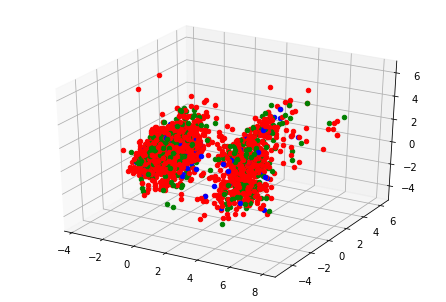

In [0]:
from mpl_toolkits.mplot3d import Axes3D
dict1={8:'green',9:'green',3:'blue',4:'blue',5:'red',6:'red',7:'green'}
Xnew=pd.DataFrame(X1)
Xnew['y']=y_train
Xnew['y']=Xnew['y'].map(dict1)
fig = plt.figure()
ax = Axes3D(fig)
for i in range(X1.shape[0]):
  ax.scatter(X1[i,0],X1[i,1],X1[i,2],c=Xnew.iloc[i,3])
plt.show()

In [0]:
pca.explained_variance_ratio_

array([0.36297216, 0.19539522, 0.1195773 ])

In [0]:
pca.singular_values_

array([146.47746394, 107.47095813,  84.07338255])

In [0]:
pca.get_covariance()

array([[ 1.03691448,  0.19664088,  0.31310127, -0.08556603,  0.39618409,
        -0.27873276, -0.32263884,  0.37690755, -0.17823522,  0.36677701,
        -0.13273869, -0.45769656,  0.45769656],
       [ 0.19664088,  0.9581284 , -0.31395287, -0.2172027 ,  0.37625792,
        -0.34938773, -0.45457735,  0.28052348,  0.35349525,  0.32362334,
        -0.09430708, -0.62342056,  0.62342056],
       [ 0.31310127, -0.31395287,  0.93697717,  0.14283229, -0.01202876,
         0.09904484,  0.15749554,  0.07298317, -0.44990237,  0.00502482,
        -0.04421201,  0.18634999, -0.18634999],
       [-0.08556603, -0.2172027 ,  0.14283229,  0.9964256 , -0.05536057,
         0.46538946,  0.54376547,  0.37385826, -0.22694177, -0.16209606,
        -0.46831967,  0.33960821, -0.33960821],
       [ 0.39618409,  0.37625792, -0.01202876, -0.05536057,  0.82407417,
        -0.25012096, -0.31885901,  0.42502623,  0.08318978,  0.33783685,
        -0.215095  , -0.52672783,  0.52672783],
       [-0.27873276, -0.349387

In [0]:
dfwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,typewhite,typered,target
0,-0.170435,-0.424794,0.277011,3.237650,-0.319553,0.835395,0.973647,2.134906,-1.360815,-0.550722,-1.423557,0.572356,-0.572356,6
1,-0.707676,-0.244379,0.139857,-0.810162,-0.204102,-0.941030,0.297035,-0.231174,0.502637,-0.287096,-0.837827,0.572356,-0.572356,6
2,0.673800,-0.364656,0.551319,0.313053,-0.175239,-0.024165,-0.326161,0.140639,0.254176,-0.616628,-0.335773,0.572356,-0.572356,6
3,-0.016938,-0.665347,0.002703,0.652137,0.055662,0.950003,1.258536,0.309644,-0.180629,-0.880254,-0.503124,0.572356,-0.572356,6
4,-0.016938,-0.665347,0.002703,0.652137,0.055662,0.950003,1.258536,0.309644,-0.180629,-0.880254,-0.503124,0.572356,-0.572356,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784424,1.559768,-1.643144,-0.725391,0.979268,0.090443,-1.269857,0.073036,1.434362,0.306062,-0.001070,-1.747165,1.747165,5
6493,-1.014670,1.259077,-1.505990,-0.683005,0.171113,0.491571,-1.145218,0.147399,1.869168,-0.015461,0.584660,-1.747165,1.747165,6
6494,-0.707676,1.018524,-1.300259,-0.661813,0.575191,-0.081470,-1.341079,0.356966,1.248017,1.426472,0.417309,-1.747165,1.747165,6
6495,-1.014670,1.830390,-1.368836,-0.725391,0.546328,0.090443,-1.269857,0.265703,2.179743,1.162846,-0.252097,-1.747165,1.747165,5


In [0]:
#reconstruction and find the outliner 
X11=pca.transform(dfwine.iloc[:,:-1])



X_re = X11.dot(pca.components_) + pca.mean_
X_re

array([[ 0.10993516, -0.42058379,  0.53373231, ..., -1.94088941,
         0.70797235, -0.70797235],
       [-0.4023737 , -0.09034327, -0.24133101, ...,  0.19763099,
         0.24067567, -0.24067567],
       [ 0.17225308, -0.32149739,  0.41618405, ..., -0.05669952,
         0.25984036, -0.25984036],
       ...,
       [-0.14569399,  1.46186631, -1.38886639, ...,  0.03129921,
        -1.43141463,  1.43141463],
       [-0.57044575,  1.80896172, -2.01031747, ..., -0.21317506,
        -1.55226337,  1.55226337],
       [ 0.49544539,  0.73433789, -0.2693039 , ...,  0.30583465,
        -1.02520987,  1.02520987]])

In [0]:
Xerro=abs(dfwine.iloc[:,:-1].values-X_re)
erro=np.mean(Xerro, axis=1)

In [0]:
dfwine['erro']=erro

Text(0.5, 1.0, 'erro distribution')

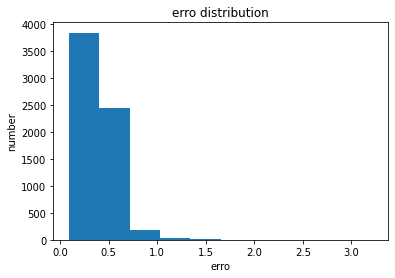

In [0]:
plt.hist(dfwine.sort_values(by='erro')['erro'])
plt.xlabel('erro')
plt.ylabel('number')
plt.title("erro distribution")

as seen above we treat the samples whose erro> 1 as outliners.

In [0]:
dfwine.sort_values(by='erro').loc[dfwine.sort_values(by='erro')['erro']>1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,typewhite,typered,target,erro
5079,1.287789,1.619906,1.168512,-0.725391,6.174554,-0.425294,-0.094688,0.850462,-0.615434,3.205947,-1.005179,-1.747165,1.747165,5,1.006526
5138,1.287789,1.770252,0.345588,-0.788969,5.972515,-1.456767,-0.949356,0.816661,-1.360815,3.667292,-1.005179,-1.747165,1.747165,5,1.013516
5550,6.660194,0.116450,2.265744,0.440209,1.152445,-0.482598,-0.789106,0.985667,-1.485045,2.019630,3.680663,-1.747165,1.747165,5,1.019708
3307,1.671532,-0.605209,-0.203027,0.652137,-0.550454,5.362415,1.650259,-0.248074,-1.981965,-1.012067,0.417309,0.572356,-0.572356,3,1.021084
2668,1.825030,1.890528,-0.751643,-0.725391,-0.492729,-0.539902,0.083367,-0.947758,-1.360815,3.074134,1.756121,0.572356,-0.572356,6,1.030181
1551,-0.477430,-0.905900,4.597362,-0.894933,1.902875,0.835395,0.243618,-0.366378,-0.801779,-1.473412,-1.507233,0.572356,-0.572356,6,1.035622
1722,0.213308,0.357003,4.665939,2.983337,-0.435004,0.147747,0.581924,1.019468,0.129946,-1.012067,1.254066,0.572356,-0.572356,6,1.065436
4473,-0.093687,0.116450,-0.820220,-0.810162,6.203416,-0.367990,0.439479,-0.379899,-0.677549,0.635595,-0.586800,0.572356,-0.572356,5,1.071926
6197,0.290057,7.453316,-2.191760,-0.704198,2.335815,-1.456767,-1.893052,0.025715,1.744938,-0.880254,0.333633,-1.747165,1.747165,3,1.072116
2872,-2.319397,-1.026177,0.277011,-0.767776,-0.781356,3.585990,0.813397,-1.586599,2.676663,2.349163,1.254066,0.572356,-0.572356,7,1.076588


we do not know why this ouliner appear, if they are caused by mistaken count we will remove it, if they are just strange sample as they should be we will keep it. here we just keep them and see what happen in next few steps.

###pca including y

In [0]:
Xnew=pd.DataFrame(X_train1)
Xnew['y']=y_train
Xnew['color']=y_train
Xnew['color']=Xnew['y'].map(dict1)

In [0]:
Xnew=Xnew.dropna()

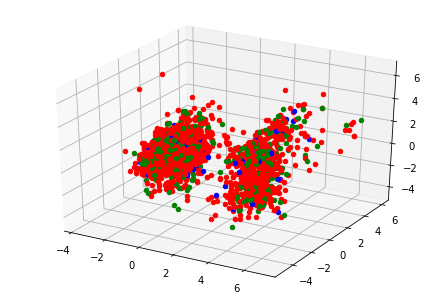

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X1=pca.fit_transform(Xnew.iloc[:,:-1])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
for i in range(X1.shape[0]):
  ax.scatter(X1[i,0],X1[i,1],X1[i,2],c=Xnew.iloc[i,-1])
plt.show()

In [0]:
dfwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,typewhite,typered,target,erro
0,-0.170435,-0.424794,0.277011,3.237650,-0.319553,0.835395,0.973647,2.134906,-1.360815,-0.550722,-1.423557,0.572356,-0.572356,6,0.428657
1,-0.707676,-0.244379,0.139857,-0.810162,-0.204102,-0.941030,0.297035,-0.231174,0.502637,-0.287096,-0.837827,0.572356,-0.572356,6,0.390656
2,0.673800,-0.364656,0.551319,0.313053,-0.175239,-0.024165,-0.326161,0.140639,0.254176,-0.616628,-0.335773,0.572356,-0.572356,6,0.296463
3,-0.016938,-0.665347,0.002703,0.652137,0.055662,0.950003,1.258536,0.309644,-0.180629,-0.880254,-0.503124,0.572356,-0.572356,6,0.212306
4,-0.016938,-0.665347,0.002703,0.652137,0.055662,0.950003,1.258536,0.309644,-0.180629,-0.880254,-0.503124,0.572356,-0.572356,6,0.212306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784424,1.559768,-1.643144,-0.725391,0.979268,0.090443,-1.269857,0.073036,1.434362,0.306062,-0.001070,-1.747165,1.747165,5,0.261322
6493,-1.014670,1.259077,-1.505990,-0.683005,0.171113,0.491571,-1.145218,0.147399,1.869168,-0.015461,0.584660,-1.747165,1.747165,6,0.358064
6494,-0.707676,1.018524,-1.300259,-0.661813,0.575191,-0.081470,-1.341079,0.356966,1.248017,1.426472,0.417309,-1.747165,1.747165,6,0.331991
6495,-1.014670,1.830390,-1.368836,-0.725391,0.546328,0.090443,-1.269857,0.265703,2.179743,1.162846,-0.252097,-1.747165,1.747165,5,0.306485


In [0]:
X11=pca.transform(dfwine.iloc[:,:-1])



X_re = X11.dot(pca.components_) + pca.mean_
Xerro=abs(dfwine.iloc[:,:-1].values-X_re)
erro=np.mean(Xerro, axis=1)

dfwine['erro']=erro

Text(0.5, 1.0, 'erro distribution')

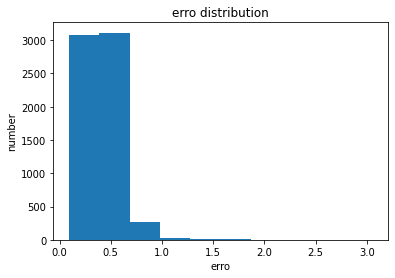

In [0]:
plt.hist(dfwine.sort_values(by='erro')['erro'])
plt.xlabel('erro')
plt.ylabel('number')
plt.title("erro distribution")

In [0]:
dfwine.sort_values(by='erro').loc[dfwine.sort_values(by='erro')['erro']>1.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,typewhite,typered,target,erro
5590,1.057543,0.898247,1.305666,-0.725391,10.561683,-0.826422,-0.949356,1.087070,-1.174470,4.194544,-1.256206,-1.747165,1.747165,5,1.501431
5124,1.287789,1.499630,1.237089,-0.725391,8.108354,-0.196078,-0.611050,0.580053,-1.112355,7.094429,-0.837827,-1.747165,1.747165,6,1.521363
5949,0.980794,0.717832,1.854282,-0.852547,10.330782,-0.826422,-1.252051,0.789620,-1.174470,5.314954,-1.088854,-1.747165,1.747165,5,1.572525
6270,1.134292,2.642256,1.305666,-0.788969,10.359644,-1.055638,-0.878134,0.522591,-1.360815,4.194544,-1.088854,-1.747165,1.747165,5,1.580398
6268,1.134292,2.642256,1.305666,-0.788969,10.359644,-1.055638,-0.878134,0.522591,-1.360815,4.194544,-1.088854,-1.747165,1.747165,5,1.580398
6217,1.441286,2.521980,2.471475,-0.788969,10.330782,-0.711814,-0.913745,0.620615,-1.981965,5.249047,-1.172530,-1.747165,1.747165,6,1.678431
5067,0.213308,2.191219,-0.545912,-0.767776,8.772196,-0.883726,-0.931551,0.580053,-1.360815,6.962616,-0.837827,-1.747165,1.747165,5,1.754443
5004,0.443554,0.417141,2.471475,-0.788969,11.860505,-0.711814,-0.824717,0.884264,-0.863894,5.117235,-1.005179,-1.747165,1.747165,5,1.810550
4979,0.443554,0.537418,2.608629,-0.746584,11.773917,-0.482598,-0.860329,0.918065,-0.553319,4.919515,-0.921503,-1.747165,1.747165,5,1.824379
5156,0.366805,0.417141,3.020091,-0.767776,16.016733,-1.284855,-1.252051,0.715258,-0.988125,4.787702,-0.921503,-1.747165,1.747165,5,2.219139


###Supervised I:  lasso to do feature selection.

In [0]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [0]:
X_trainsub, X_testsub, y_trainsub, y_testsub = train_test_split(X_train, y_train.tolist(), test_size=0.3,random_state=42)


In [0]:
from sklearn.linear_model import Lasso
lamblist=[0.001,0.003,0.006,0.01,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05]
y_testsub=np.array(y_testsub)
diflist=[]
for i in lamblist:
  lasso_reg = Lasso(alpha=i,max_iter=10000)
  lasso_reg.fit(X_trainsub, y_trainsub)
  ypred=lasso_reg.predict(X_testsub)
  dif=ypred-y_testsub
  dif=np.dot(dif,dif.T)/len(dif)
  diflist.append(dif)

Text(0.5, 1.0, 'MSE-lamb')

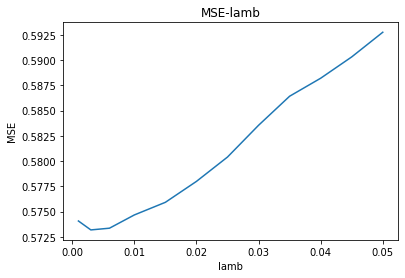

In [0]:
plt.plot(lamblist,diflist)
plt.xlabel('lamb')
plt.ylabel('MSE')
plt.title("MSE-lamb")

In [0]:
#so when lambda=0.003, when have the least MSE, we choose 0.005 to do the lasso. 
lamb = 0.003
lasso_reg = Lasso(alpha=lamb)
lasso_reg.fit(X_train, y_train)
a=lasso_reg.coef_.tolist()
ilist=[]
for i in range(len(a)):
  if a[i]==0:
    ilist.append(i)
print(len(ilist))
dfwine.iloc[:,ilist].columns
#so we need to drop the feature 'typered'
#it can be explain that we already have typewhite and we donot need typewhite any more, why red?

1


Index(['typered'], dtype='object')

In [0]:
dfwine.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'typewhite',
 'typered',
 'target',
 'erro']

Text(0.5, 1.0, 'coef_-feature')

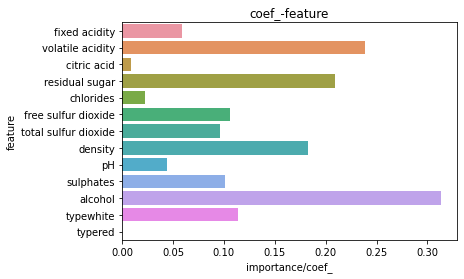

In [0]:
im=lasso_reg.coef_.tolist()
for i in range(len(im)):
  im[i]=abs(im[i])


import seaborn as sns

sns.barplot(y=dfwine.columns.tolist()[:-2],x=im)
plt.xlabel('importance/coef_')
plt.ylabel('feature')
plt.title('coef_-feature')


In [0]:
dfwine=dfwine.drop(columns=['typered','erro'],axis=1)
dict2={3:'low',4:'low',5:'low',6:"medium",7:"high",8:"high",9:"high"}
dfwine['target']=dfwine['target'].map(dict2)
dfwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,typewhite,target
0,-0.170435,-0.424794,0.277011,3.237650,-0.319553,0.835395,0.973647,2.134906,-1.360815,-0.550722,-1.423557,0.572356,medium
1,-0.707676,-0.244379,0.139857,-0.810162,-0.204102,-0.941030,0.297035,-0.231174,0.502637,-0.287096,-0.837827,0.572356,medium
2,0.673800,-0.364656,0.551319,0.313053,-0.175239,-0.024165,-0.326161,0.140639,0.254176,-0.616628,-0.335773,0.572356,medium
3,-0.016938,-0.665347,0.002703,0.652137,0.055662,0.950003,1.258536,0.309644,-0.180629,-0.880254,-0.503124,0.572356,medium
4,-0.016938,-0.665347,0.002703,0.652137,0.055662,0.950003,1.258536,0.309644,-0.180629,-0.880254,-0.503124,0.572356,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.784424,1.559768,-1.643144,-0.725391,0.979268,0.090443,-1.269857,0.073036,1.434362,0.306062,-0.001070,-1.747165,low
6493,-1.014670,1.259077,-1.505990,-0.683005,0.171113,0.491571,-1.145218,0.147399,1.869168,-0.015461,0.584660,-1.747165,medium
6494,-0.707676,1.018524,-1.300259,-0.661813,0.575191,-0.081470,-1.341079,0.356966,1.248017,1.426472,0.417309,-1.747165,medium
6495,-1.014670,1.830390,-1.368836,-0.725391,0.546328,0.090443,-1.269857,0.265703,2.179743,1.162846,-0.252097,-1.747165,low


###model selection and tuning 

In [0]:
#random state keep the split result same...
X_train, X_test, y_train, y_test = train_test_split(dfwine.iloc[:,:-1], dfwine.iloc[:,-1], test_size=0.3,random_state=42)
from sklearn.metrics import accuracy_score

###RFR

In [0]:
dict3={'high':3,'low':1,'medium':2}
y_train1=y_train.copy()
y_train1=y_train1.map(dict3)


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



depthlist=[10,20,30,40,50,60,70,80,90,100]
estimatorslist=[25,50,75,100,125,150,200,300]
accuracylist=[]
for m in depthlist:
  for n in estimatorslist:
    forest=RandomForestRegressor(max_depth=m,n_estimators=n, random_state=50,n_jobs=-1)
    scores1=cross_val_score(forest,X_train,y_train1,cv=5)
    accuracyscore=scores1.mean()
    accuracylist.append(accuracyscore)
    #print(m,n)

print(max(accuracylist))
accuracylist.index(max(accuracylist))

0.49470095926613045


31

In [0]:
forest=RandomForestRegressor(max_depth=40,n_estimators=200, random_state=50, verbose=1, n_jobs=-1)
forest.fit(X_train,y_train1)

importances=forest.feature_importances_.tolist()
featurelist=X_train.columns.tolist()

dfrf=pd.DataFrame(columns=['importances','featurelist'])
dfrf['importances']=importances
dfrf['featurelist']=featurelist

dfrf=dfrf.sort_values(by=['importances'],ascending=False)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.6s finished


Text(0.5, 1.0, 'importance-feature')

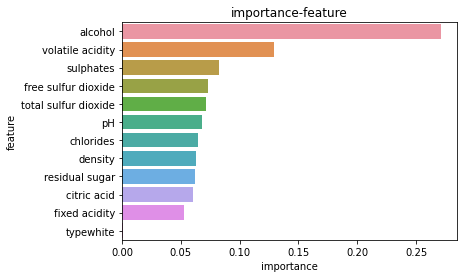

In [0]:
sns.barplot(y=dfrf['featurelist'],x=dfrf['importances'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.title('importance-feature')


###logistic regression with L1 regulization

In [0]:
from sklearn.linear_model import LogisticRegression
clist=[0.001,0.005,0.01,0.05,0.1,0.5,1]
solverlist=['liblinear','saga'] 
clisting=[]
solv=[]
scorelist=[]
for c in clist:
  for sol in solverlist:
    clf = LogisticRegression(penalty='l1',C=c,solver=sol,max_iter=10000)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    scores=scores.mean()
    scorelist.append(scores)
    clisting.append(c)
    solv.append(sol)
    #print(c,sol)


print(max(scorelist))
print(scorelist.index(max(scorelist)))
print(clisting[scorelist.index(max(scorelist))])
print(solv[scorelist.index(max(scorelist))])

0.5821380819400621
10
0.5
liblinear


In [0]:
from sklearn.feature_selection import RFE
model = LogisticRegression(penalty='l1',C=0.5,solver='liblinear',max_iter=10000) 
rfe = RFE(model, 1)
fit=rfe.fit(X_train, y_train)

print("Feature Ranking: %s"% fit.ranking_)
dfl1ranking=pd.DataFrame(fit.ranking_)
dfl1ranking.columns=['rank']
dfl1ranking['feature']=X_train.columns.tolist()
dfl1ranking.sort_values(by=['rank'])

Feature Ranking: [ 8  2 12  6 11  4  3  7  9  5  1 10]


,rank,feature
10,1,alcohol
1,2,volatile acidity
6,3,total sulfur dioxide
5,4,free sulfur dioxide
9,5,sulphates
3,6,residual sugar
7,7,density
0,8,fixed acidity
8,9,pH
11,10,typewhite


###logistic regression with L2 regulization

In [0]:
from sklearn.linear_model import LogisticRegression
clist=[0.001,0.005,0.01,0.05,0.1,0.5,1]
solverlist=['newton-cg', 'lbfgs','liblinear','sag','saga'] 
clisting=[]
solv=[]
scorelist=[]
for c in clist:
  for sol in solverlist:
    clf = LogisticRegression(penalty='l2',C=c,solver=sol,max_iter=10000)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    scores=scores.mean()
    scorelist.append(scores)
    clisting.append(c)
    solv.append(sol)
    #print(c,sol)


print(max(scorelist))
print(scorelist.index(max(scorelist)))
print(clisting[scorelist.index(max(scorelist))])
print(solv[scorelist.index(max(scorelist))])

0.5827976643818229
27
0.5
liblinear


###Knn

In [0]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
ilist=[1,2,5,10,25,50,75,100,150,200]
for i in ilist:
  knn= KNeighborsClassifier(n_neighbors=i)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  scores=scores.mean()
  scorelist.append(scores)

print(max(scorelist))
print(scorelist.index(max(scorelist)))

0.6408631632394008
0


###RF

In [0]:
from sklearn.ensemble import RandomForestClassifier

depthlist=[10,20,30,40,50,60,70,80,90,100]
estimatorslist=[25,50,75,100,125,150,200,300]
accuracylist=[]
for m in depthlist:
  for n in estimatorslist:
    rf0 = RandomForestClassifier(oob_score=True, random_state=12,max_depth=m,n_estimators=n)
    scores1=cross_val_score(rf0,X_train,y_train,cv=5)
    accuracyscore=scores1.mean()
    accuracylist.append(accuracyscore)
    print(m,n)

In [0]:
print(max(accuracylist))
accuracylist.index(max(accuracylist))

0.7015633651277215


23

###XGBoosts

In [0]:
from sklearn import metrics
from xgboost.sklearn import XGBClassifier


depthlist=[10,20,30,40,50,60,70,80,90,100]
estimatorslist=[25,50,75,100,125,150,200,300]

accuracylist=[]
for m in depthlist:
  for n in estimatorslist:
   clf = XGBClassifier(max_depth=m,n_estimators=n)
   scores1=cross_val_score(clf,X_train,y_train,cv=10)
   accuracyscore=scores1.mean()  
   accuracylist.append(accuracyscore)
   print(m,n)

print(max(accuracylist))
accuracylist.index(max(accuracylist))

10 25
10 50
10 75
10 100
10 125
10 150
10 200
10 300
20 25
20 50
20 75
20 100
20 125
20 150
20 200
20 300
30 25
30 50
30 75
30 100
30 125
30 150
30 200
30 300
40 25
40 50
40 75
40 100
40 125
40 150
40 200
40 300
50 25
50 50
50 75
50 100
50 125
50 150
50 200
50 300
60 25
60 50
60 75
60 100
60 125
60 150
60 200
60 300
70 25
70 50
70 75
70 100
70 125
70 150
70 200
70 300
80 25
80 50
80 75
80 100
80 125
80 150
80 200
80 300
90 25
90 50
90 75
90 100
90 125
90 150
90 200
90 300
100 25
100 50
100 75
100 100
100 125
100 150
100 200
100 300
0.6940857820593502


30

#apply the best model on the test set

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf0 = RandomForestClassifier(oob_score=True, random_state=12,max_depth=30,n_estimators=300)
rf0.fit(X_train,y_train)
print (rf0.oob_score_)
y_pred = rf0.predict(X_test)
accuracyscore=accuracy_score(y_pred,y_test)
accuracyscore

0.7094787772157466


0.7112820512820512

Text(0.5, 1.0, 'Confusion Matrix')

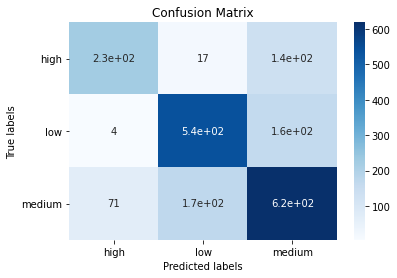

In [0]:
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,rf0.predict(X_test)), cmap='Blues', annot=True)
ax.xaxis.set_ticklabels(['high','low','medium'])
ax.yaxis.set_ticklabels(['high','low','medium'],rotation=0)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')


Text(0.5, 1.0, 'distribution in y_test')

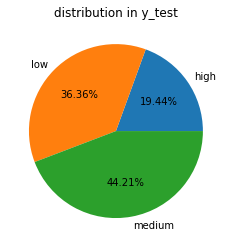

In [0]:
ilist=['high','low','medium']
numlist=[]
for i in ilist:
  numlist.append(y_test.tolist().count(i))

plt.pie(numlist,labels=ilist,autopct='%1.2f%%')
plt.title('distribution in y_test')

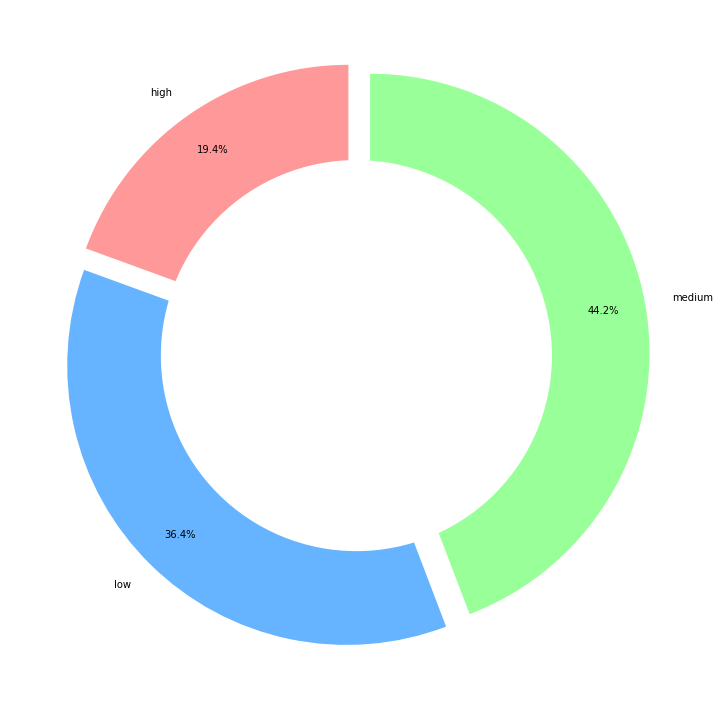

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Pie chart
labels = ilist
sizes = numlist
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
 
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'distribution in y_test')

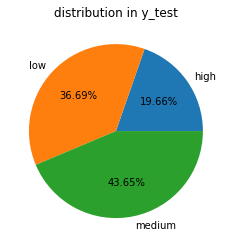

In [0]:
ylisting=y.tolist()
for i in range(len(ylisting)):

  ylisting[i]=dict2[ylisting[i]]

ilist=['high','low','medium']
numlist=[]
for i in ilist:
  numlist.append(ylisting.count(i))

plt.pie(numlist,labels=ilist,autopct='%1.2f%%')
plt.title('distribution in y')